# Topic 28 - Microbes Classification

## EDA

### Libraries and Data loading

In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

plt.rcParams["figure.dpi"] =  100
df = pd.read_csv('microbes.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

### Structure of the dataset

Now we take a look at overall dataset structure

In [93]:
print('features:\n', df.columns, end='\n\n')
print(df.head(3), end='\n\n')
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}', end='\n\n')

features:
 Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97          10.9  ...         2.97   
1        18.60         22.5          5.41          19.2  ...         5.47   
2        21.00         22.4          5.

We can see that the dataset has **30527** samples and **24** features. Target will be the last column - classify each microorganism.

In [94]:
features = df.drop(columns=['microorganisms'])
target = df['microorganisms']

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, stratify=target, random_state=42)

Lets now investigate what types given features have.  
As well as check if we have any missing/zero values.

In [96]:
print(x_train.info(), end='\n\n')
print(y_train.info(), end='\n\n')
print('missing values in features: ', (x_train.isna().any().any()))
print('missing values in target: ', (y_train.isna().any().any()))
print('zero values in features: ', (x_train==0.0).any().any())
print('zero values in target: ', (y_train==0.0).any().any())

<class 'pandas.core.frame.DataFrame'>
Index: 22895 entries, 1026 to 563
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         22895 non-null  float64
 1   Eccentricity     22895 non-null  float64
 2   EquivDiameter    22895 non-null  float64
 3   Extrema          22895 non-null  float64
 4   FilledArea       22895 non-null  float64
 5   Extent           22895 non-null  float64
 6   Orientation      22895 non-null  float64
 7   EulerNumber      22895 non-null  float64
 8   BoundingBox1     22895 non-null  float64
 9   BoundingBox2     22895 non-null  float64
 10  BoundingBox3     22895 non-null  float64
 11  BoundingBox4     22895 non-null  float64
 12  ConvexHull1      22895 non-null  float64
 13  ConvexHull2      22895 non-null  float64
 14  ConvexHull3      22895 non-null  float64
 15  ConvexHull4      22895 non-null  float64
 16  MajorAxisLength  22895 non-null  float64
 17  MinorAxisLength 

As we can see the dataset does not have any missing points, however, it has zero values, which needs to be investigated further.

In [97]:
x_train.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,...,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000,22895.000000
mean,9.675428,19.476049,3.619691,11.852826,0.414397,5.838982,11.716631,22.384860,10.906129,10.418501,...,11.033502,11.009093,1.601447,1.012370,0.826721,0.257066,11.735390,11.570452,0.795290,5.205664
std,4.053705,3.477182,2.194389,6.056433,0.853360,3.246020,6.590978,0.957234,6.105542,5.800286,...,6.102408,6.102247,1.672813,1.258192,1.157531,1.026860,6.042734,5.698949,1.152536,2.800949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,17.300000,2.170000,6.760000,0.093500,3.295000,5.950000,22.300000,5.660000,5.750000,...,5.750000,5.730000,0.634000,0.422000,0.253000,0.034950,6.560000,7.110000,0.217000,3.010000
50%,9.340000,20.700000,3.370000,12.000000,0.228000,5.250000,12.100000,22.600000,10.900000,10.100000,...,11.000000,11.000000,1.150000,0.743000,0.512000,0.085500,12.000000,11.200000,0.511000,5.290000
75%,12.600000,22.200000,4.570000,17.200000,0.432000,7.850000,17.200000,22.900000,15.800000,15.000000,...,15.900000,15.900000,2.060000,1.210000,0.960000,0.197000,16.900000,16.200000,0.929000,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


Each feature column has a minimal value of 0.0 and maximal value of 23.0, which is odd.  
Not all features (such as area) can logically take 0.0 values.  
Thus, we compute the number of zero values.

In [98]:
print('number of zero values overall: ', (x_train == 0.0).any(axis=1).sum())

number of zero values overall:  185


In [99]:
non_zero_columns = ['EquivDiameter', 'Perimeter', 'ConvexArea', 'Area', 'raddi']

In [100]:
print('number of zero values in definitely non-zero columns:', (x_train[non_zero_columns] == 0.0).any(axis=1).sum())

number of zero values in definitely non-zero columns: 43


As 43 samples is not big quantity, comparing to number of sampled in data set, we decide to delete rows, containing zeros.

In [101]:
train_df = x_train.join(y_train)
train_df = train_df[~(train_df[non_zero_columns] == 0.0).any(axis=1)]
x_train = train_df.drop('microorganisms', axis=1)
y_train = train_df['microorganisms']

In [102]:
x_train.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,...,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000,22852.000000
mean,9.672401,19.481833,3.623809,11.850407,0.415083,5.833755,11.713935,22.383952,10.902310,10.419235,...,11.029898,11.005443,1.603673,1.013561,0.827852,0.257513,11.732884,11.573029,0.796576,5.214549
std,4.051071,3.466934,2.194248,6.053872,0.854015,3.237470,6.594272,0.957897,6.102914,5.798144,...,6.099837,6.099662,1.673580,1.259054,1.158317,1.027774,6.040018,5.696264,1.153236,2.795478
min,0.000000,3.480000,0.027600,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009430,0.000000,0.001370,0.000013,0.000000,0.000000,0.000191,0.126000
25%,6.590000,17.300000,2.190000,6.760000,0.093800,3.290000,5.940000,22.300000,5.660000,5.760000,...,5.750000,5.730000,0.635000,0.423000,0.253000,0.035000,6.560000,7.110000,0.220000,3.110000
50%,9.340000,20.700000,3.370000,12.000000,0.228000,5.240000,12.100000,22.600000,10.900000,10.100000,...,11.000000,11.000000,1.150000,0.744000,0.514000,0.085600,12.000000,11.200000,0.511000,5.320000
75%,12.600000,22.200000,4.572500,17.200000,0.433000,7.850000,17.200000,22.900000,15.800000,15.000000,...,15.900000,15.900000,2.060000,1.210000,0.962000,0.197000,16.900000,16.200000,0.931000,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


### Duplicates

We need to see if we have any duplicates in samples.

In [573]:
#train_df = x_train.join(y_train)
print(x_train.join(y_train).duplicated().value_counts(), end='\n\n')


True     18088
False     4764
Name: count, dtype: int64



In [575]:
train_df_no_dupl = x_train.join(y_train).drop_duplicates(keep='first')

train_df_no_dupl.drop(columns='ConvexHull2', inplace=True) # delete ConvexHull2 the same way as for initial dataset

x_train_no_dupl = train_df_no_dupl.iloc[:, :-1]
y_train_no_dupl = train_df_no_dupl[train_df_no_dupl.columns[-1]]

During modelling we will try different versions of data set: with and without duplicates.

### Distribution of classes

Lets investigate given classes in a more precise manner.

number of classes:  10


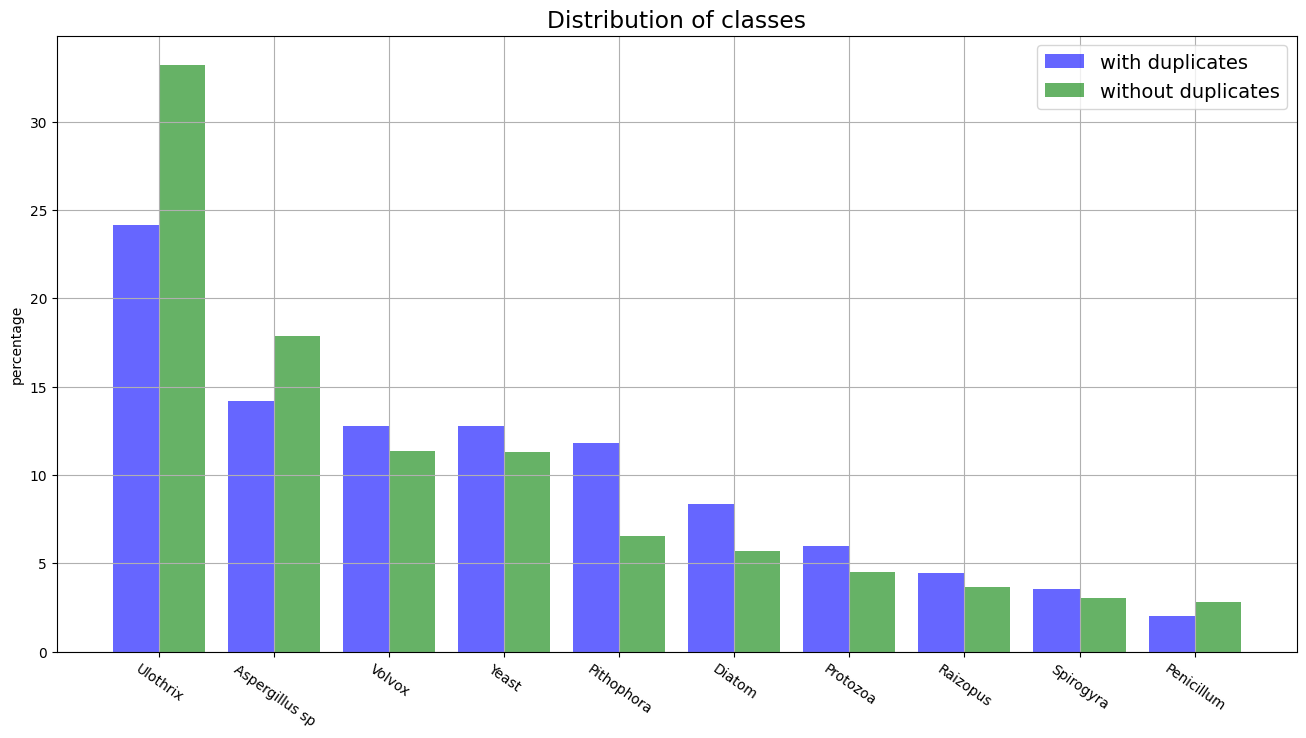

In [105]:
class_distribution = y_train.value_counts(normalize=True)*100
class_distrib_duplicates = train_df_no_dupl['microorganisms'].value_counts(normalize=True)*100

print('number of classes: ', len(class_distribution))

fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.4
bars1 = ax.bar(indices, class_distribution, bar_width, label='with duplicates', color='blue', alpha=0.6)
bars2 = ax.bar(indices + bar_width, class_distrib_duplicates, bar_width, label='without duplicates', color='green', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(class_distrib_duplicates.index)


plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()
plt.legend()

We can observe that dataset is **highly** imbalanced, that is the reason to use stratify method in train_test_split.

### Boxplots and outliers

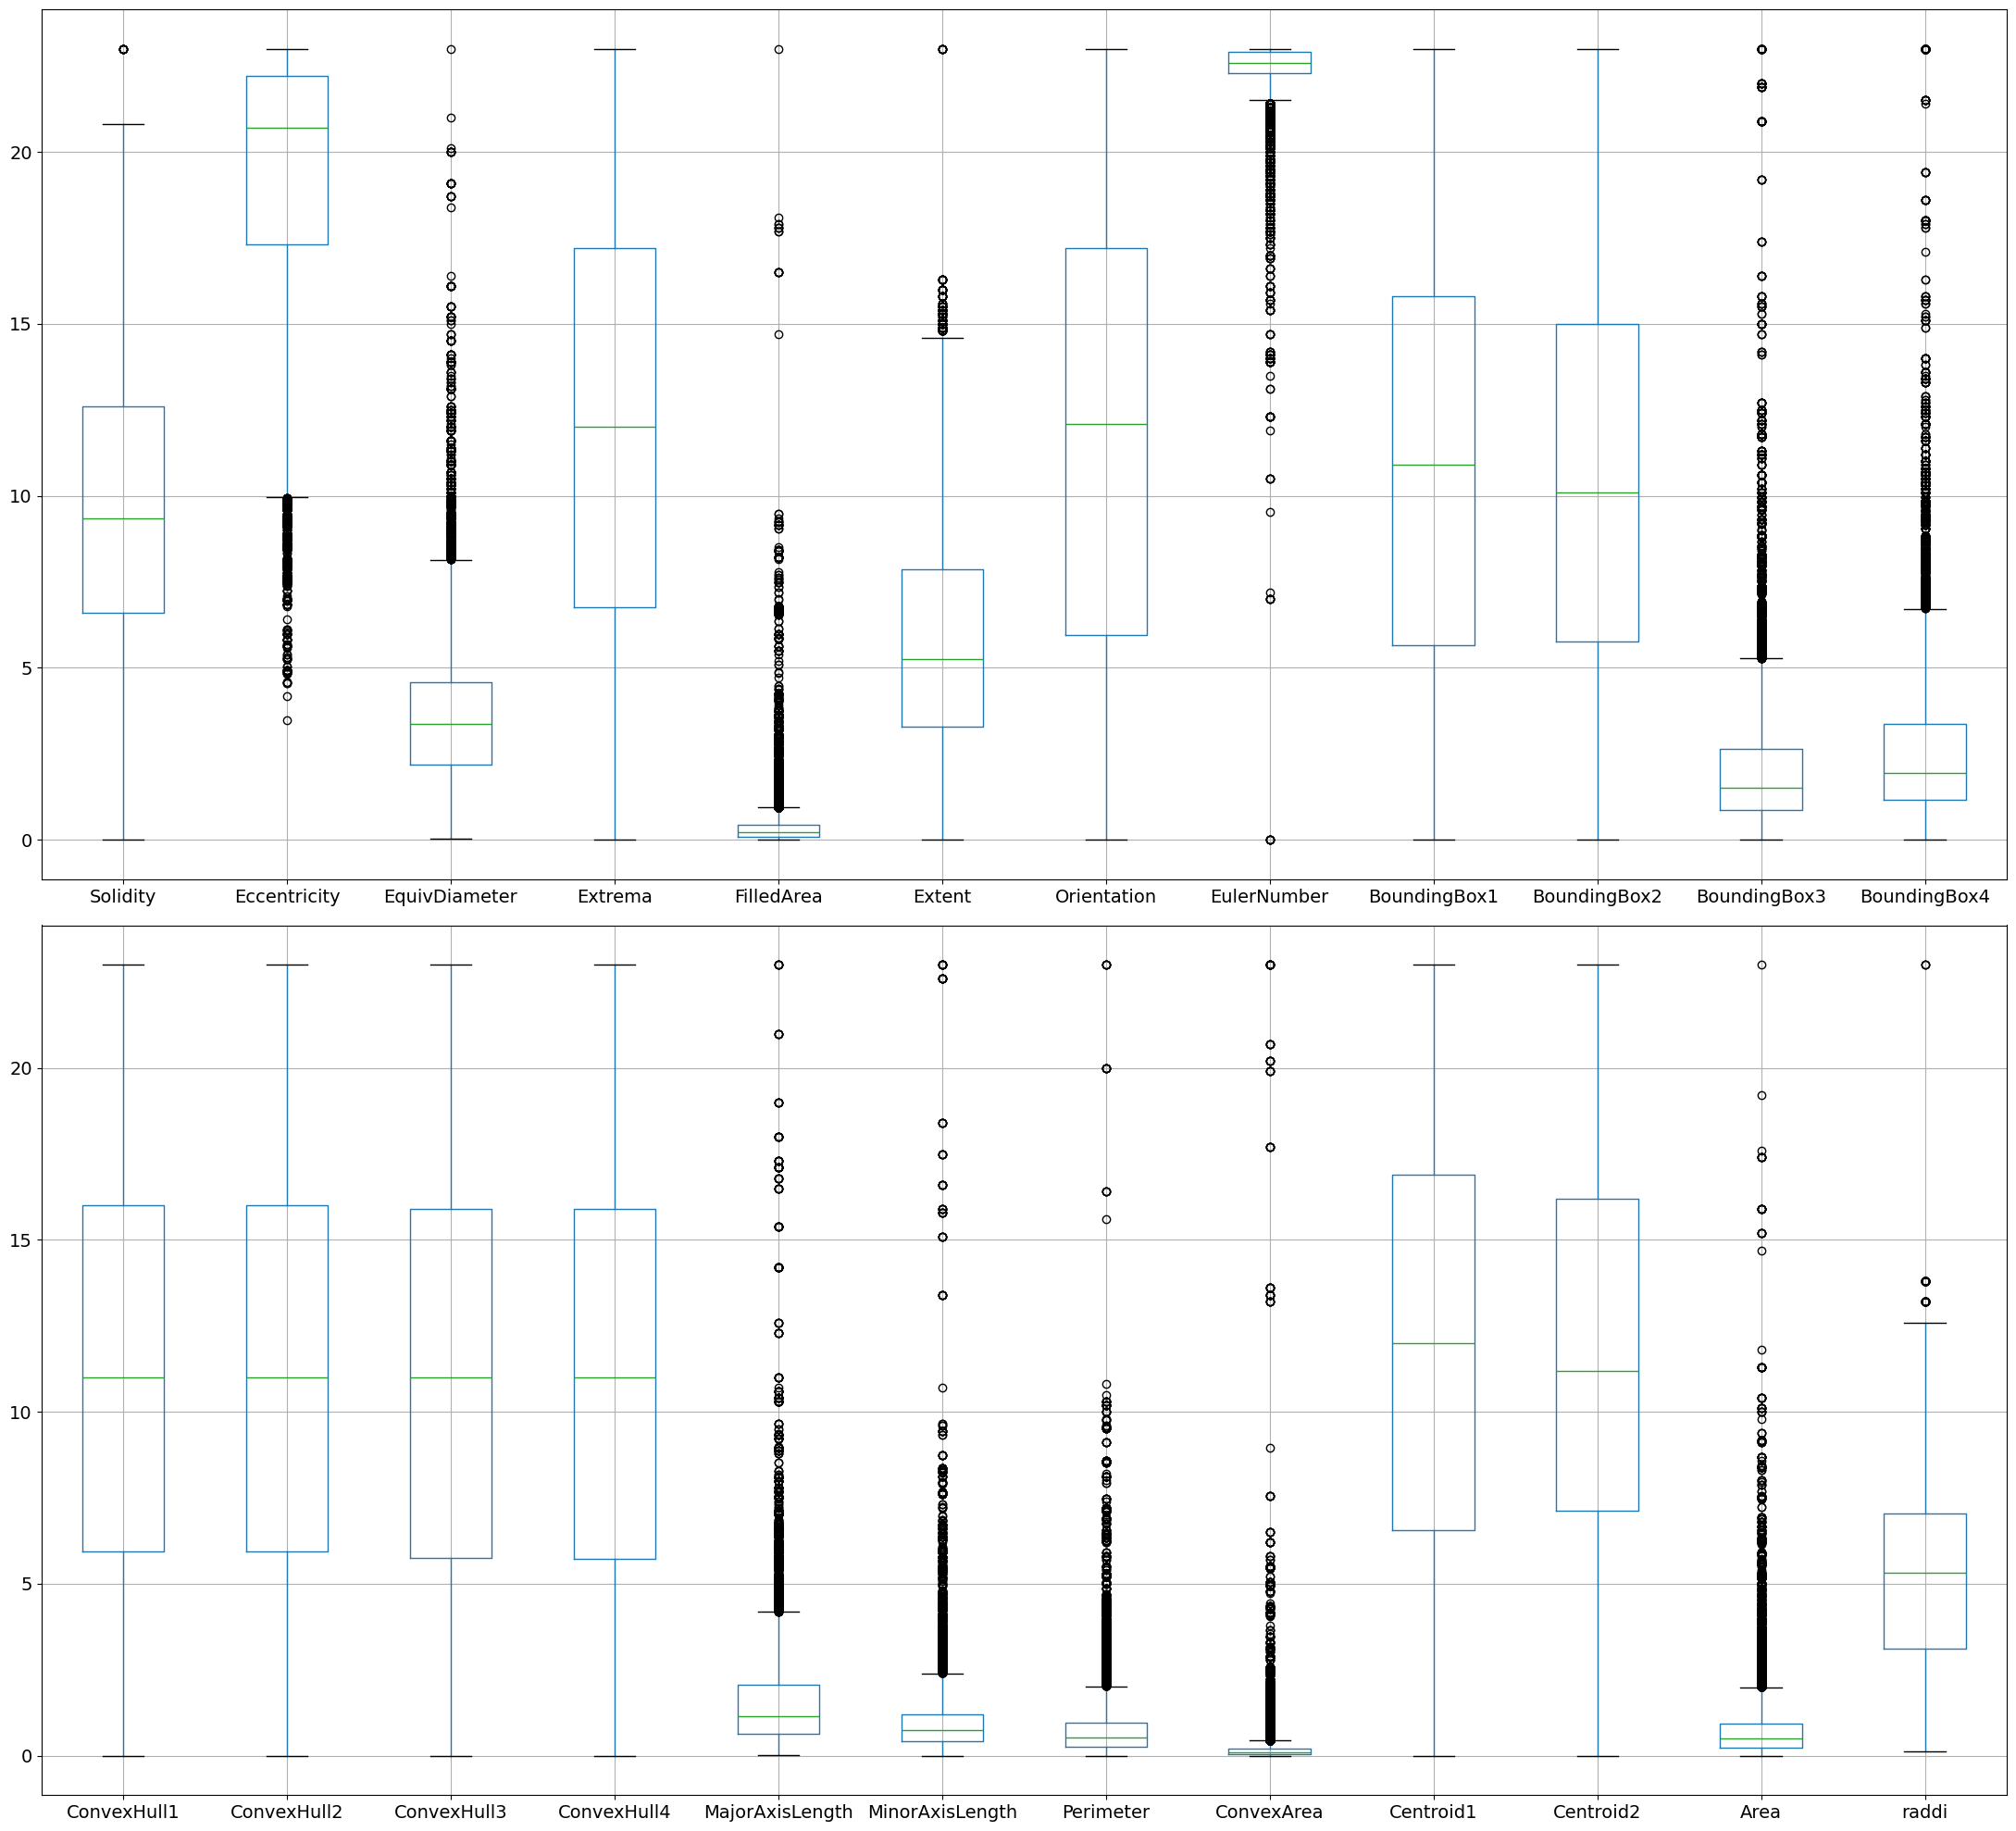

In [106]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
x_train.boxplot(ax=ax1, column=list(x_train.columns)[:12], fontsize=14)
x_train.boxplot(ax=ax2, column=list(x_train.columns)[12:], fontsize=14)
plt.tight_layout()

From the boxplots above we can clearly see that the dataset contains a lot of extreme outliers. There are different ways to calculate outliers, namely using quantiles and standard deviation.

Firstly we calculate number of outliers using quantiles.

In [107]:
q25 = x_train.quantile(q=0.25)
q50 = x_train.quantile(q=0.50)
q75 = x_train.quantile(q=0.75)
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

In [108]:
iqr_outliers = x_train[(x_train < lower_bound) | (x_train > upper_bound)].any(axis=1)

print('Number of outliers using IQR:', iqr_outliers.sum().max())

Number of outliers using IQR: 4191


Secondly we find outliers using standard deviation.

In [109]:
std = x_train.std(axis=0)
mean = x_train.mean(axis=0)
outliers = (abs(x_train - mean) > (3 * std))

print('Number of outliers using std:', outliers.sum().max())

Number of outliers using std: 418


We see that the number of outliers, calculated using IQR is 10 times bigger, using std. Then we will work with outliers using different transformators and comparing there influence on models.

### Distribution of features

<Figure size 2200x2000 with 0 Axes>

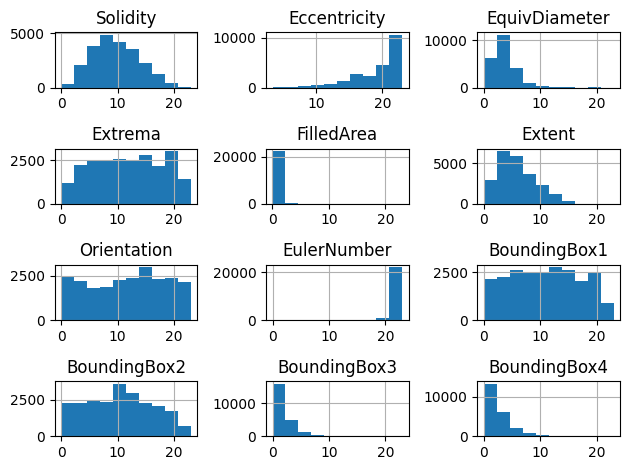

In [110]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[:12]].hist()
plt.tight_layout()

<Figure size 2200x2000 with 0 Axes>

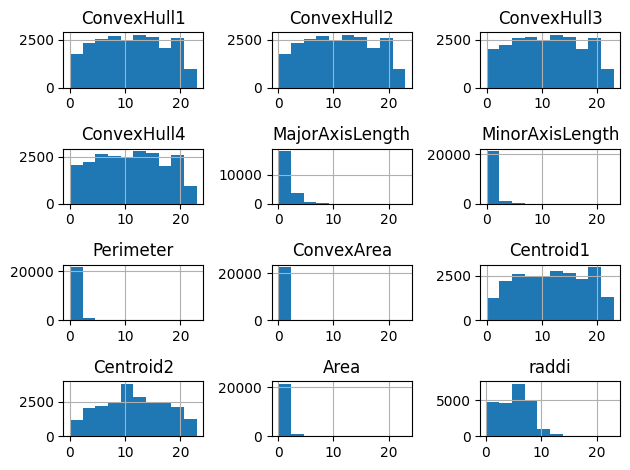

In [111]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[12:]].hist()
plt.tight_layout()

We notice that the distribution of features is rarely standard, as well, some parameters take smaller values, then others. As the distribution is not Gaussian and we have outliers StandardScaler won't probably give good results.

### Corellation matrix

<Axes: >

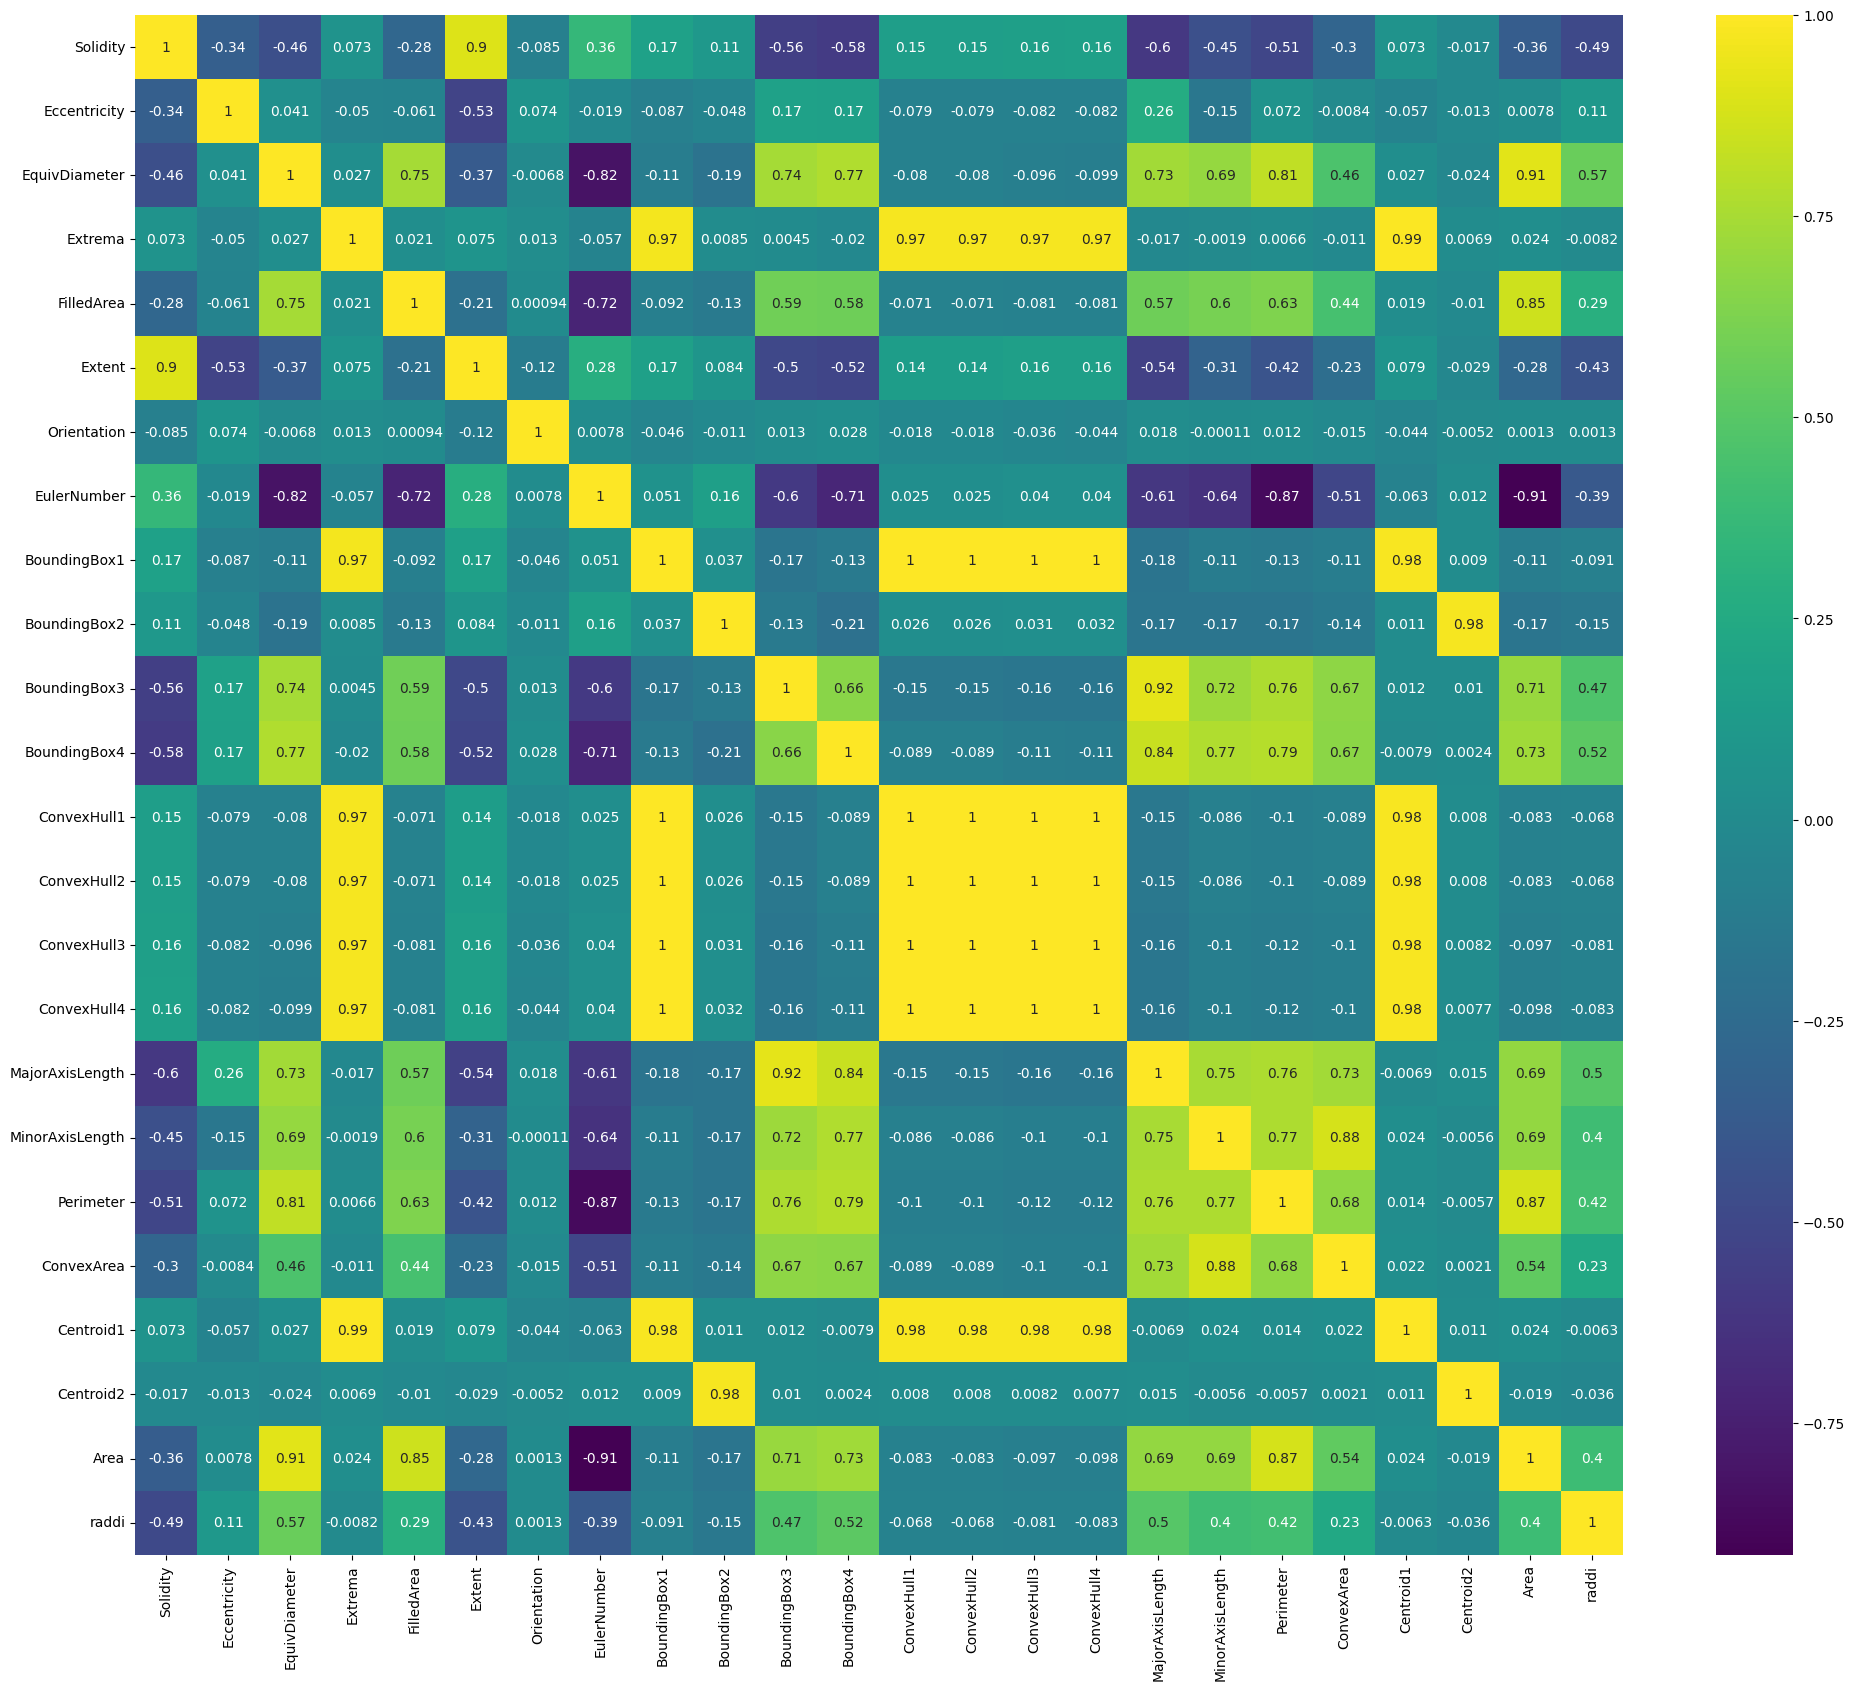

In [112]:
matrix = x_train.corr()
plt.figure(figsize=(24,20))
sns.heatmap(matrix, cmap="viridis", annot=True)

Correlation coef = 1 is suspicuos, so we will look at these columns closer.

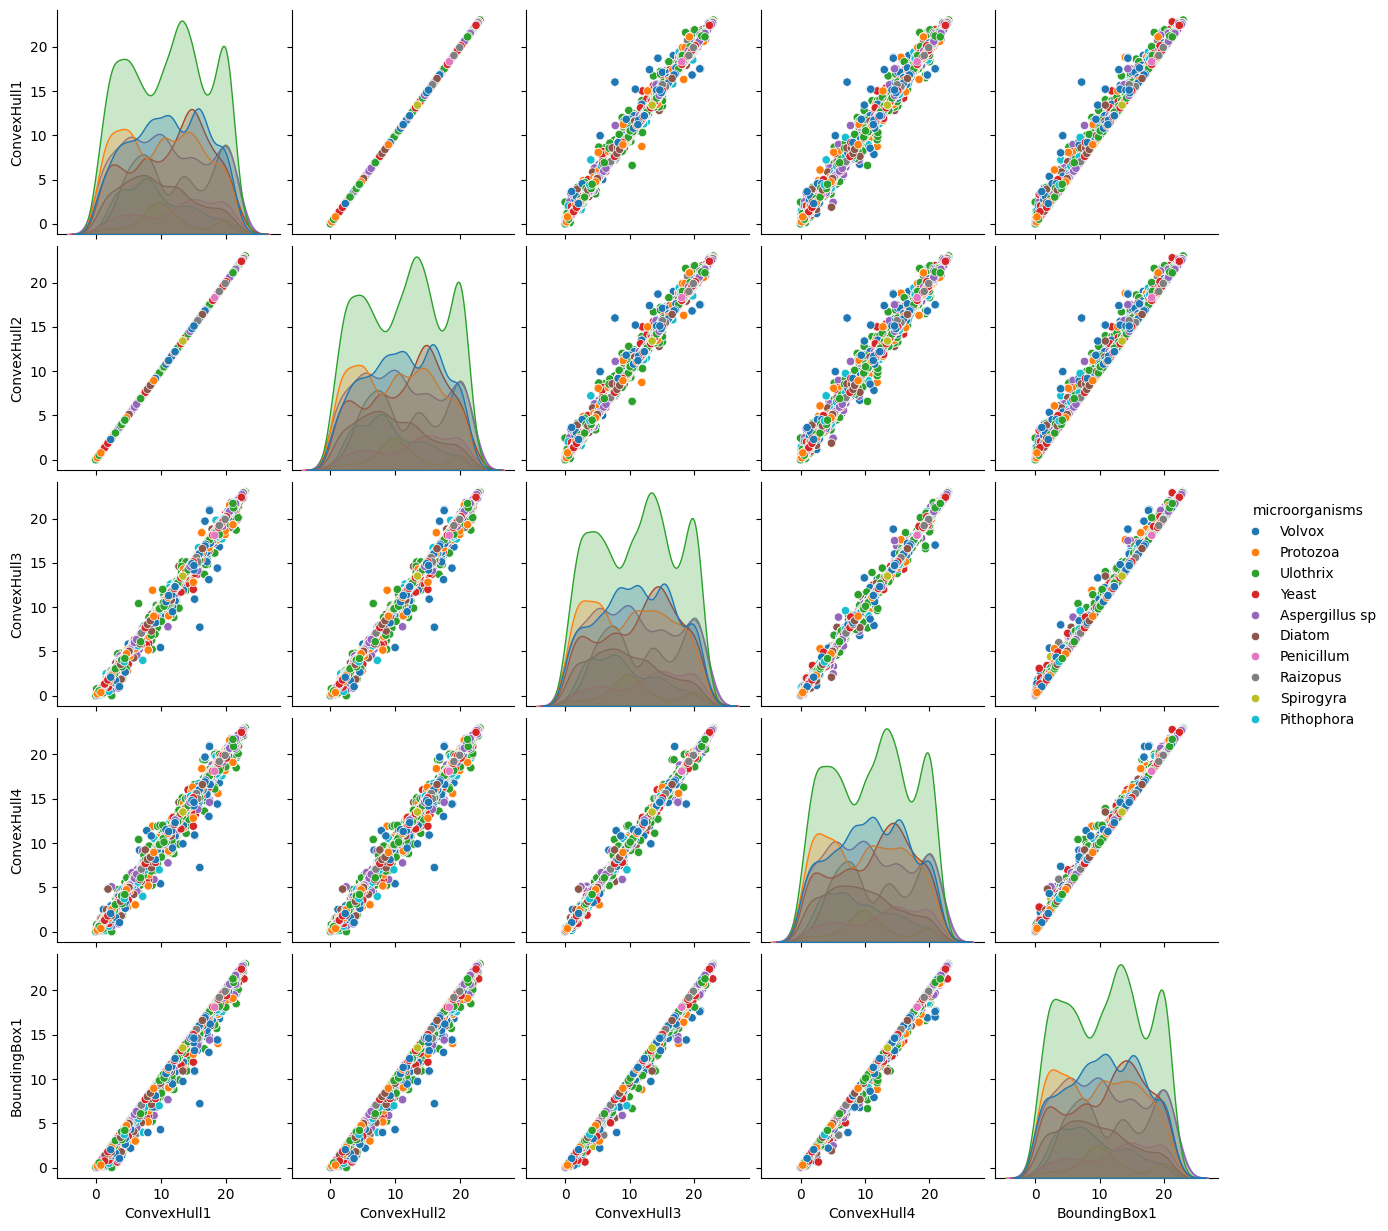

In [113]:
train_df = x_train.join(y_train)
sns.pairplot(
        data=train_df, 
        vars=train_df[['ConvexHull1', 'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'BoundingBox1']],
        hue='microorganisms',
        )
plt.show()

The linear dependence for all selected features is obvious, but the most strange dependence is between ConvexHull1 and ConvexHull2, so we want to compare these columns.

In [114]:
convex_hull_array = np.array(df[['ConvexHull1', 'ConvexHull2']])
print(np.sum(np.diff(convex_hull_array)))

0.0


As the difference between the entries of the ConvexHull1 and ConvexHull2 is equal to 0, we conclude that ConvexHull1=ConvexHull2 and delete this feature from data set (train and test data).

In [115]:
x_train.drop(columns='ConvexHull2', inplace=True)
x_train.rename(columns={'ConvexHull3': 'ConvexHull2', 'ConvexHull4': 'ConvexHull3'}, inplace=True)

x_test.drop(columns='ConvexHull2', inplace=True)
x_test.rename(columns={'ConvexHull3': 'ConvexHull2', 'ConvexHull4': 'ConvexHull3'}, inplace=True)


In [116]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22852 entries, 1026 to 563
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         22852 non-null  float64
 1   Eccentricity     22852 non-null  float64
 2   EquivDiameter    22852 non-null  float64
 3   Extrema          22852 non-null  float64
 4   FilledArea       22852 non-null  float64
 5   Extent           22852 non-null  float64
 6   Orientation      22852 non-null  float64
 7   EulerNumber      22852 non-null  float64
 8   BoundingBox1     22852 non-null  float64
 9   BoundingBox2     22852 non-null  float64
 10  BoundingBox3     22852 non-null  float64
 11  BoundingBox4     22852 non-null  float64
 12  ConvexHull1      22852 non-null  float64
 13  ConvexHull2      22852 non-null  float64
 14  ConvexHull3      22852 non-null  float64
 15  MajorAxisLength  22852 non-null  float64
 16  MinorAxisLength  22852 non-null  float64
 17  Perimeter       

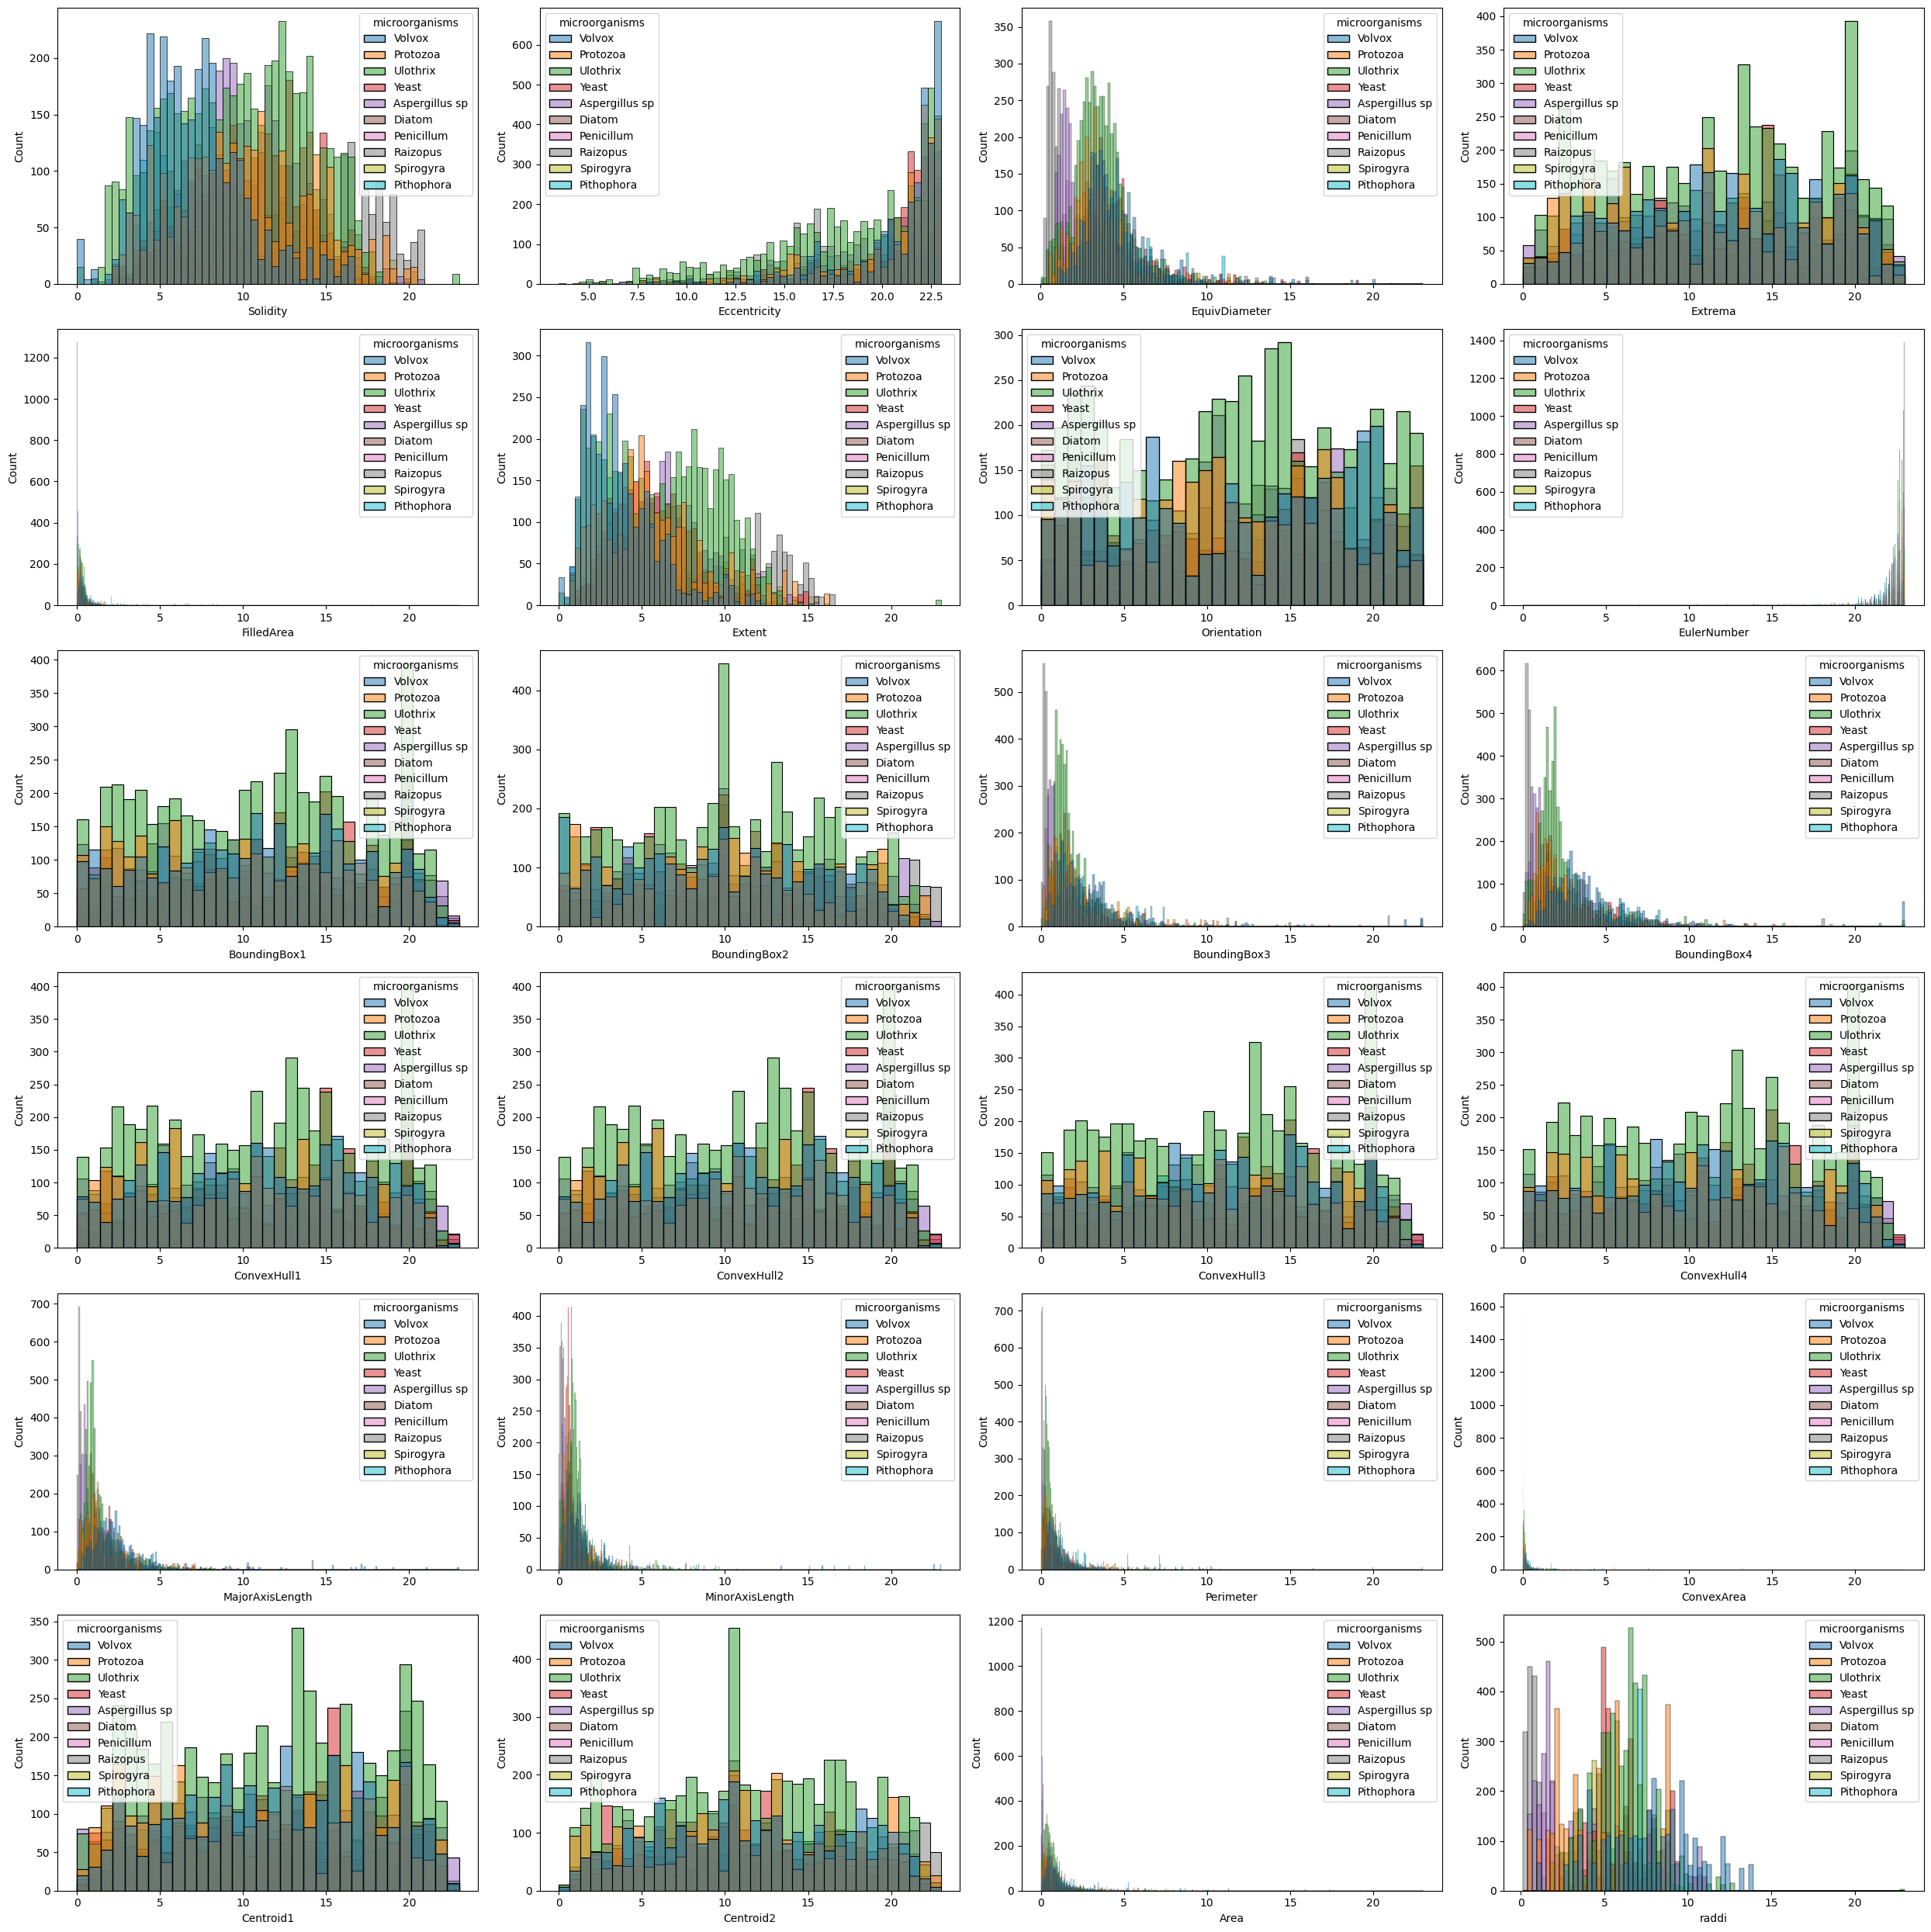

In [117]:
fig, ax = plt.subplots(6, 4, figsize=(25, 25))

for name, a in zip(train_df.columns[:-1], ax.ravel()):
  sns.histplot(data=train_df, x=name, hue="microorganisms", ax=a)

plt.tight_layout()
plt.show()

### Conclusion of EDA

We acknowledge the following problems:
1. The data set is highly imbalanced with the smallest class containing roughly 2% of data. However despite this fact we don't want to simplify the problem to binary classification or to classification of 2-3 biggest classes and will stick to multiclass classification of all given classes.
2. The data set contains outliers and is not standardised. For some classifiers (for example KNN of Logistic Regression) it is crucial for features to be in a specific range. Thus, we will use different transformers to shift and scale each feature in a suitable way.
3. The data set contains a huge amount of duplicates. However deleting them influences the distribution of the data among classes, so we don't decide to delete duplicates in advance and will study the behaviour of models with/without duplicates. 
4. The data set contains several columns with linear dependence. This issue as well will be a subject of study during modelling.
   
Model performance evaluation:  

As it states in the dataset description, the correct classification of given microorganism is crucial. Thus we assume that all classes have the same worth. Therefore, the most valuable metric for model evaluation shall be **Recall**, however, to gain a full picture of model performance we will also use **Cohen's Kappa** as it fits good with the imbalanced classification and finally a precision-recall curve to see corellation between recall and precision. It is also worth using confusion matrix to gain additional information of model performance.

### Data transformation

As data contains outliers and features take different range of values we will transform data before modelling. 
According to userguide (https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) we would like to compare the following transformers:
1. StandardScaler. According to userguide cannot guarantee balanced feature scales in the presence of outliers. We want to use it to compare what is 'good'/'bad' result for our data set.
2. MinMaxScaler. Min and max values we will calculate depending on mean and std for each feature, s.t. min = mean - 3std, max = mean + 3std.
3. RobustScaler. The centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers.
4. PowerTransformer. Applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness. The optimal scaling factor is determined via maximum likelihood estimation. Has 2 variations: Yeo-Johnson and Box-Cox. Box-Cox can only be applied to strictly positive data, that is not suitable for our case because of 0 values. So we will apply Yeo-Johnson method.
5. QuantileTransformer (uniform output). Applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. All the data, including outliers, will be mapped to a uniform distribution with the range [0, 1], making outliers indistinguishable from inliers.
6. QuantileTransformer (Gaussian output). 
7. Normalizer. Rescales the vector for each sample to have unit norm, independently of the distribution of the samples.

In [118]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer

In [119]:
x_train_scaled = [x_train, ]

For MinMaxScaler min and max parameters are different for each feature and depend on mean and std of this feature.

In [120]:
min_max_ranges = {}

for feature in x_train:
   min = mean[feature] - 3*std[feature]
   max = mean[feature] + 3*std[feature]
   min_max_ranges[feature] = (min, max)

min_max_x_train = pd.DataFrame(index=x_train.index)
min_max_x_test = pd.DataFrame(index=x_test.index)

for feature, (min_val, max_val) in min_max_ranges.items():
    min_max_scaler = MinMaxScaler(feature_range=(min_val, max_val))
    min_max_x_train[feature] = min_max_scaler.fit_transform(x_train[[feature]])

x_train_scaled.append(min_max_x_train)


In [121]:
scalers = [StandardScaler(),
           RobustScaler(),
           PowerTransformer(method='yeo-johnson'),
           QuantileTransformer(output_distribution='uniform'),
           QuantileTransformer(output_distribution='normal'),
           Normalizer(),
           ]

In [122]:
for scaler in scalers:
    x_train_scaled.append(pd.DataFrame(scaler.fit_transform(x_train)))

## Quick-and-dirty modelling

In this section we will try models with default parameters and then will tune them.

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import recall_score, f1_score, cohen_kappa_score, classification_report


For better comparison of results we will save them into a dataframe. 

In [124]:
list_of_scalers = [
    'No scaling',
    'MinMaxScaler',
    'StandardScaler',
    'RobustScaler',
    'PowerTransformer',
    'QuantileTransformer (uniform)',
    'QuantileTransformer (Gaussian)',
    'Normalizer',
    ]

In [125]:
data = {
    'Scaler': None,
    'train accuracy' : None,
    'test accuracy': None,
    'weighted recall': None,
    'macro recall': None,
    'weighted f1': None,
    'macro f1': None,
    'Cohens Kappa': None,
}

In [126]:
kNN_quick_scores = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))

In [127]:
skf = StratifiedKFold(n_splits=5) #default parameter

for count, x_train_scale in enumerate(x_train_scaled):

    neigh = KNeighborsClassifier(n_neighbors=5) #default parameter

    scores = cross_validate(neigh,
                        x_train_scale,
                        y_train,
                        cv=skf, 
                        return_train_score=True)
    
    predictions = cross_val_predict(neigh,
                                x_train_scale,
                                y_train,
                                cv=skf,
                                method='predict',
                                )

    kNN_quick_scores.loc[count] = [
        list_of_scalers[count],
        scores['train_score'].mean(),
        scores['test_score'].mean(),
        recall_score(y_train, predictions, average='weighted'),
        recall_score(y_train, predictions, average='macro'),
        f1_score(y_train, predictions, average='weighted'),
        f1_score(y_train, predictions, average='macro'),
        cohen_kappa_score(y_train, predictions)
        ]


In [128]:
display(kNN_quick_scores)

,Scaler,train accuracy,test accuracy,weighted recall,macro recall,weighted f1,macro f1,Cohens Kappa
0,No scaling,0.939415,0.8864,0.886399,0.864594,0.884105,0.868712,0.868056
1,MinMaxScaler,0.937139,0.878829,0.878829,0.858342,0.876501,0.861727,0.859275
2,StandardScaler,0.940891,0.887187,0.887187,0.867617,0.885388,0.870068,0.869048
3,RobustScaler,0.942696,0.890032,0.890032,0.871291,0.888341,0.873794,0.872335
4,PowerTransformer,0.942576,0.890382,0.890382,0.869617,0.888726,0.872662,0.872731
5,QuantileTransformer (uniform),0.940629,0.889332,0.889331,0.870776,0.887697,0.871898,0.871584
6,QuantileTransformer (Gaussian),0.940377,0.888107,0.888106,0.869621,0.886337,0.871853,0.870141
7,Normalizer,0.938145,0.883862,0.883861,0.862214,0.881446,0.866359,0.86513


Logistic regression

In [269]:
logreg_quick_scores = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))

In [ ]:
for count, x_train_scale in enumerate(x_train_scaled):

    logreg = LogisticRegression(multi_class='multinomial', max_iter=20000)

    scores = cross_validate(logreg,
                        x_train_scale,
                        y_train,
                        cv=skf, 
                        return_train_score=True)
    
    predictions = cross_val_predict(logreg,
                                x_train_scale,
                                y_train,
                                cv=skf,
                                method='predict',
                                )

    logreg_quick_scores.loc[count] = [
        list_of_scalers[count],
        scores['train_score'].mean(),
        scores['test_score'].mean(),
        recall_score(y_train, predictions, average='weighted'),
        recall_score(y_train, predictions, average='macro'),
        f1_score(y_train, predictions, average='weighted'),
        f1_score(y_train, predictions, average='macro'),
        cohen_kappa_score(y_train, predictions)
        ]

In [275]:
display(logreg_quick_scores)

,Scaler,train accuracy,test accuracy,weighted recall,macro recall,weighted f1,macro f1,Cohens Kappa
0,No scaling,0.496565,0.495493,0.495493,0.403548,0.478092,0.404658,0.402547
1,MinMaxScaler,0.48219,0.479652,0.479652,0.386129,0.462104,0.389158,0.382844
2,StandardScaler,0.491926,0.491073,0.491073,0.39855,0.473436,0.399795,0.396779
3,RobustScaler,0.490504,0.489411,0.48941,0.398616,0.471681,0.399192,0.394972
4,PowerTransformer,0.503796,0.500744,0.500744,0.42703,0.488665,0.436179,0.411172
5,QuantileTransformer (uniform),0.461251,0.458954,0.458953,0.362726,0.441275,0.364524,0.359884
6,QuantileTransformer (Gaussian),0.475648,0.4716,0.4716,0.40436,0.459308,0.414141,0.374738
7,Normalizer,0.412338,0.410993,0.410992,0.283531,0.370602,0.269759,0.28911


We observe that difference between transformed data and no transformation barely exists.

## Model training

Before we proceed with model training, lets look at the classes distribution once again.  
Since we used stratify=True for data spliting, results for the whole dataset and the train dataset are going to be the same. Thus, lets look only on training dataset classes distribution.

In [620]:
round(y_train_no_dupl.value_counts(normalize=True)*100, 2)

microorganisms
Ulothrix          33.21
Aspergillus sp    17.84
Volvox            11.34
Yeast             11.31
Pithophora         6.57
Diatom             5.67
Protozoa           4.53
Raizopus           3.67
Spirogyra          3.02
Penicillum         2.83
Name: proportion, dtype: float64

As the dataset is imbalanced, we will try 3 variations of train sets, namely: original, undersampled and oversampled (with RandomOverSampler and SMOTE) (the last two to ensure equal distribution of classes).

In practice, it depends on the problem whether to train model on imbalanced dataset or on the truncated one with equal distribution. We will check each option and determine how good it will influence model performance. 

In [557]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, KernelPCA

In [558]:
under = RandomUnderSampler(random_state=42)
over = RandomOverSampler(random_state=73)

In [518]:
# undersampling
X_under, Y_under = under.fit_resample(x_train_no_dupl, y_train_no_dupl)

# oversampling
X_over, Y_over = over.fit_resample(x_train_no_dupl, y_train_no_dupl)

In [ ]:
# combined sampling 
# вряд ли это нам будет полезно

'''under_2 = RandomUnderSampler(sampling_strategy='majority')
over_2 = RandomOverSampler(sampling_strategy='not majority')

X_over_2, Y_over_2 = over_2.fit_resample(x_train_no_dupl, y_train_no_dupl)
X_over_under, Y_over_under = under_2.fit_resample(X_over_2, Y_over_2)

round(Y_over_under.value_counts(normalize=True)*100, 2)'''

SMOTE

We need to make a quick gridsearch over several values of k_neighbors for SMOTE to determine the best option that we will use further to resample the data.  
We will use KNN as a model.

In [611]:
smote_pipe = ImbPipeline([
    ('smote', SMOTE(random_state=73)),
    ('rbscaler', RobustScaler()),
    ('knn', KNeighborsClassifier(5))
])

param_grid = {'smote__k_neighbors': np.arange(1, 10, 1),
              'knn__n_neighbors': np.arange(1, 5, 1)}

smote_grid = GridSearchCV(smote_pipe, param_grid=param_grid, scoring='recall_weighted', cv=5)

smote_grid.fit(x_train_no_dupl, y_train_no_dupl)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=73)),
                                       ('rbscaler', RobustScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([1, 2, 3, 4]),
                         'smote__k_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='recall_weighted')

In [613]:
print(smote_grid.best_params_)
print(smote_grid.best_score_)

{'knn__n_neighbors': 1, 'smote__k_neighbors': 6}
0.5098605024381212


In [597]:
sm_best = SMOTE(sampling_strategy='auto', k_neighbors=smote_grid.best_params_['smote__k_neighbors'], random_state=73)
X_smoted_best, Y_smoted_best = sm_best.fit_resample(x_train_no_dupl, y_train_no_dupl)

Lets now look at the graphs.

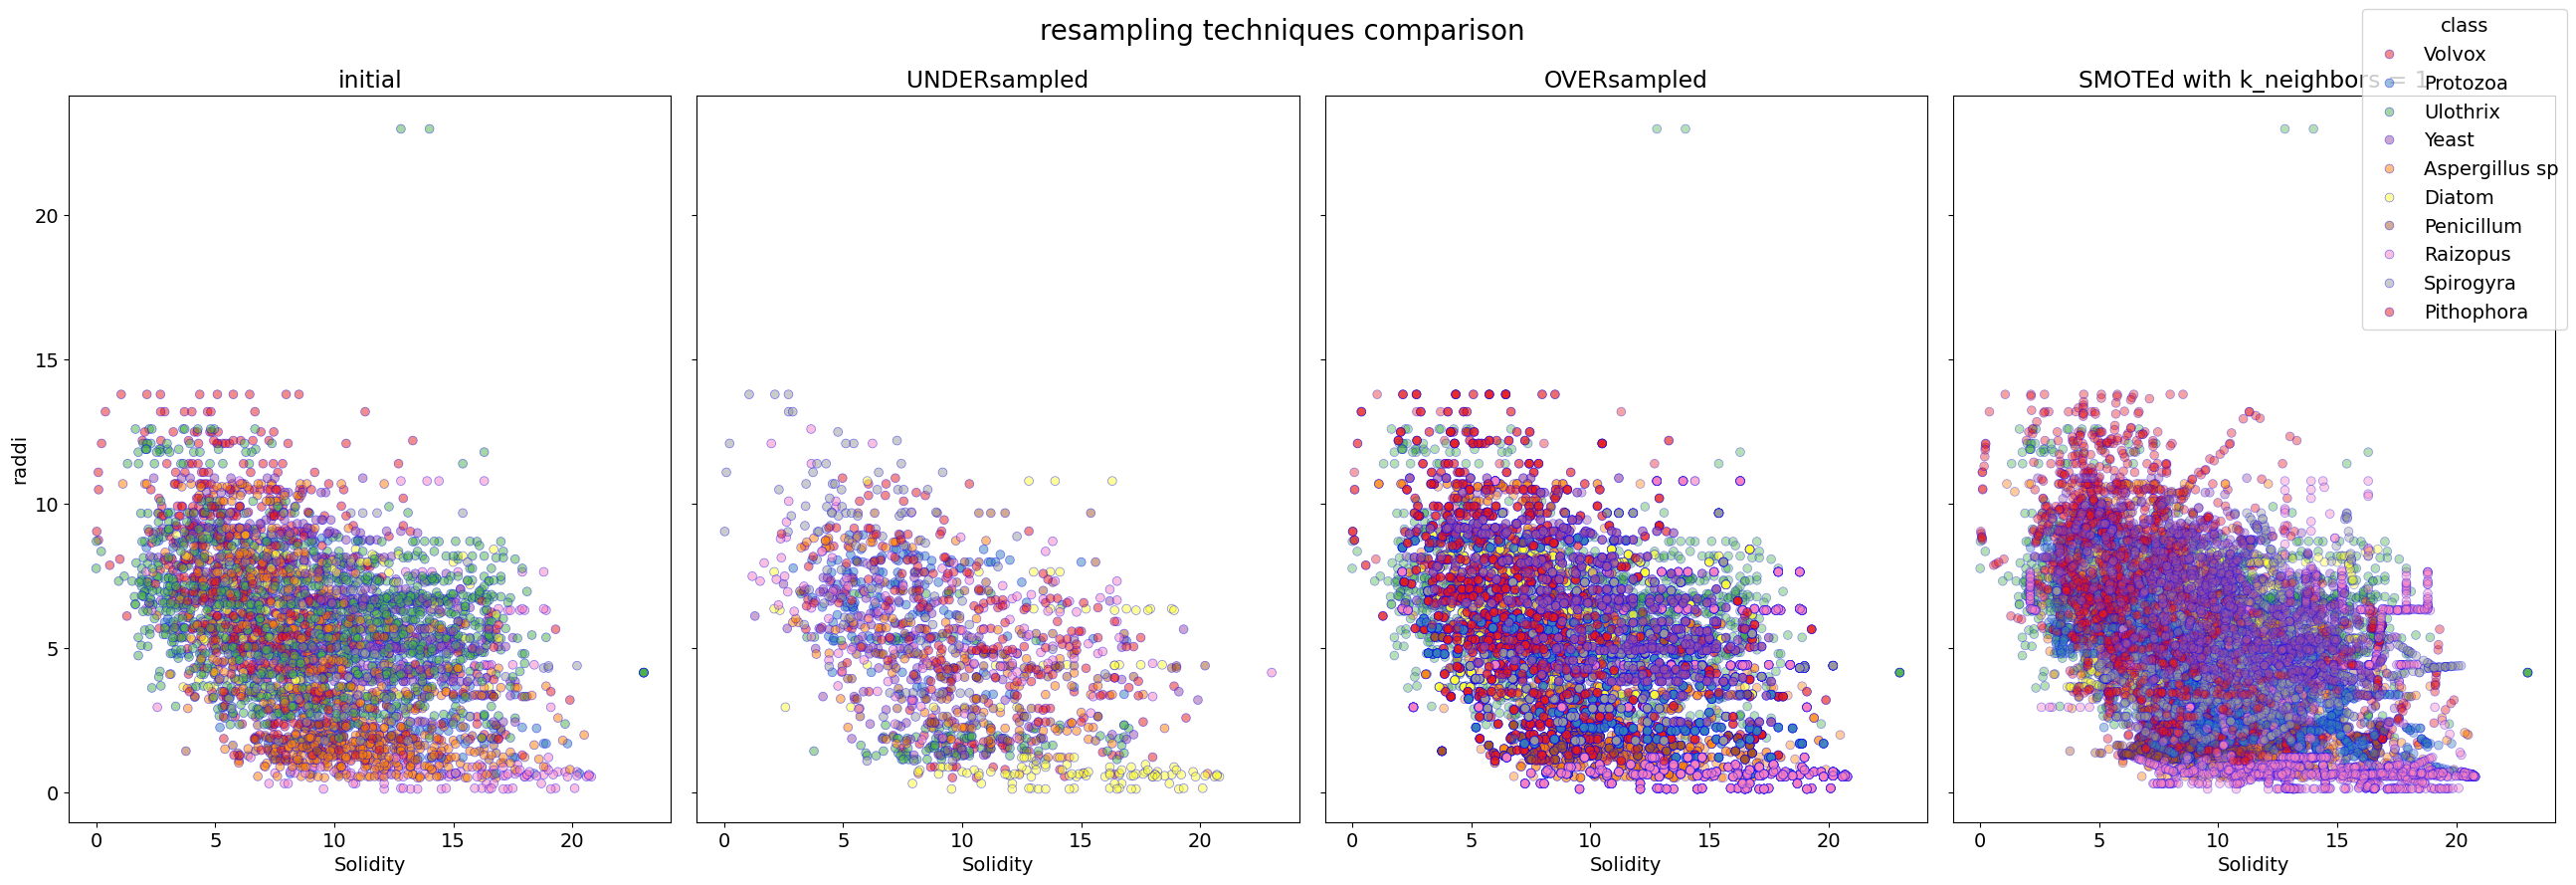

In [598]:
plt.rcParams['legend.loc'] = 'best'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(26, 9))
sns.scatterplot(x='Solidity', y='raddi', hue='microorganisms', data=train_df_no_dupl, palette='Set1',
                s=40, alpha=0.5, edgecolor='b', ax=ax1)
sns.scatterplot(x='Solidity', y='raddi', hue='microorganisms', data=X_under.join(Y_under), palette='Set1',
                s=40, alpha=0.5, edgecolor='b', ax=ax2)
sns.scatterplot(x='Solidity', y='raddi', hue='microorganisms', data=X_over.join(Y_over), palette='Set1',
                s=40, alpha=0.4, edgecolor='b', ax=ax3)
sns.scatterplot(x='Solidity', y='raddi', hue='microorganisms', data=X_smoted_best.join(Y_smoted_best), palette='Set1',
                s=40, alpha=0.4, edgecolor='b', ax=ax4)

ax1.set_title('initial')
ax2.set_title('UNDERsampled')
ax3.set_title('OVERsampled')
ax4.set_title(f'SMOTEd with k_neighbors = {smote_grid.best_params_['smote__k_neighbors']}')
ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='class')

plt.suptitle('resampling techniques comparison', fontsize=20)


plt.tight_layout()
plt.show()

And check new available distributions.

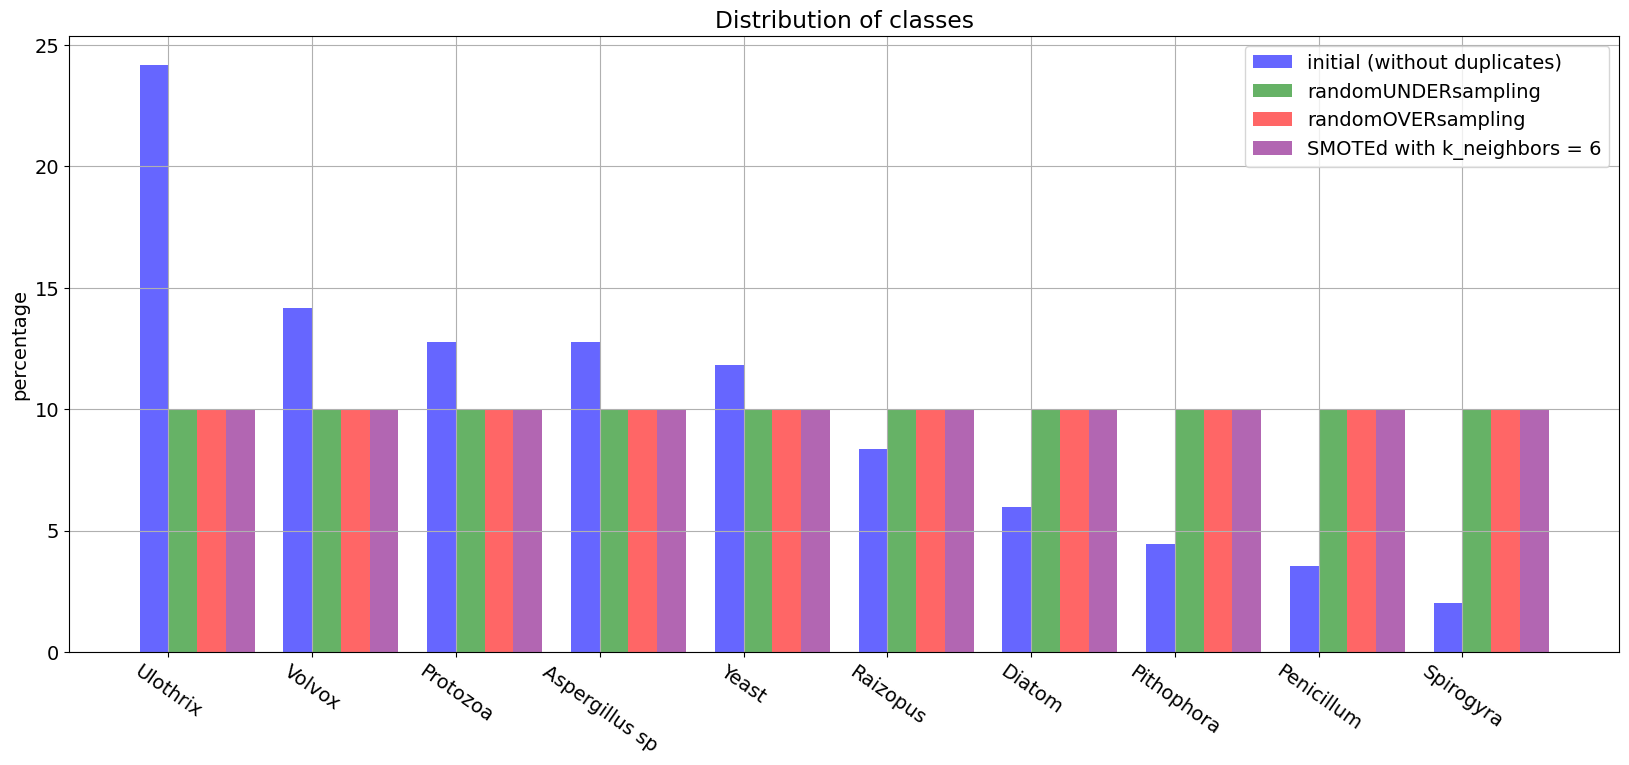

In [617]:
initial_distr = y_train.value_counts(normalize=True)*100
rus_distr = Y_under.value_counts(normalize=True)*100
ros_distr = Y_over.value_counts(normalize=True)*100
sm_distr = Y_smoted_best.value_counts(normalize=True)*100

fig, ax = plt.subplots(figsize=(20, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.2
bars1 = ax.bar(indices, initial_distr, bar_width, label='initial (without duplicates)', color='blue', alpha=0.6)
bars2 = ax.bar(indices + bar_width, rus_distr, bar_width, label='randomUNDERsampling', color='green', alpha=0.6)
bars3 = ax.bar(indices + 2*bar_width, ros_distr, bar_width, label='randomOVERsampling', color='red', alpha=0.6)
bars4 = ax.bar(indices + 3*bar_width, sm_distr, bar_width, label=f'SMOTEd with k_neighbors = {smote_grid.best_params_['smote__k_neighbors']}', color='purple', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices + bar_width / 2, y_train.unique())
ax.set_xticklabels(initial_distr.index)


plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()
plt.legend()

Thus the dataset is now balanced. However, we need to look at the amount of samples after each sampling technique.

In [619]:
print('smallest class in')
print(' initial dataset: ', train_df_no_dupl['microorganisms'].value_counts().min())
print(' UNDERsampled: ', X_under.join(Y_under)['microorganisms'].value_counts().min())
print(' OVERsampled: ', X_over.join(Y_over)['microorganisms'].value_counts().min())
print(' SMOTEd: ', X_smoted_best.join(Y_smoted_best)['microorganisms'].value_counts().min())

print()
print('biggest class in')
print(' initial dataset: ', train_df_no_dupl['microorganisms'].value_counts().max())
print(' UNDERsampled: ', X_under.join(Y_under)['microorganisms'].value_counts().max())
print(' OVERsampled: ', X_over.join(Y_over)['microorganisms'].value_counts().max())
print(' SMOTEd: ', X_smoted_best.join(Y_smoted_best)['microorganisms'].value_counts().max())




smallest class in
 initial dataset:  135
 UNDERsampled:  135
 OVERsampled:  1582
 SMOTEd:  1582

biggest class in
 initial dataset:  1582
 UNDERsampled:  135
 OVERsampled:  1582
 SMOTEd:  1582


PCA